<a href="https://colab.research.google.com/github/Sanayaghimire/Data_Science/blob/main/Copy_of_heart_failure_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [111]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px
# import plotly.graph_objects as go

#Data Preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [112]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [113]:
data = pd.read_csv('/content/drive/MyDrive/Data_Science/heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [114]:
row,col = data.shape
print(row)
print(col)

299
13


In [115]:
# There is not NaN or null values in columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [116]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [117]:
select_col = ['anaemia','diabetes','high_blood_pressure']

In [118]:
select_col_df = data[['anaemia','diabetes', 'high_blood_pressure']]
select_col_df = select_col_df.describe()
select_col_df

,anaemia,diabetes,high_blood_pressure
count,299.000000,299.000000,299.000000
mean,0.431438,0.418060,0.351171
std,0.496107,0.494067,0.478136
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000


In [119]:
mean_value = select_col_df.iloc[3:6,:]
mean_value

,anaemia,diabetes,high_blood_pressure
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0


In [120]:
mean_value = select_col_df.iloc[1:2,:].values[0]
mean_value

array([0.43143813, 0.4180602 , 0.35117057])

In [121]:
mean_value = select_col_df.iloc[1:2,:]
mean_value

,anaemia,diabetes,high_blood_pressure
mean,0.431438,0.41806,0.351171


In [122]:
data['diabetes'].mean()

0.4180602006688963

In [123]:
# Replacing the values equal to 0 by the median
for col in select_col:
    data[col].replace(0, data[col].median(), inplace=True)
    # print(data[col])
    # print(data.loc[:,col])

In [124]:
# print(col)
# data.loc[:,col].median()

In [125]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [126]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


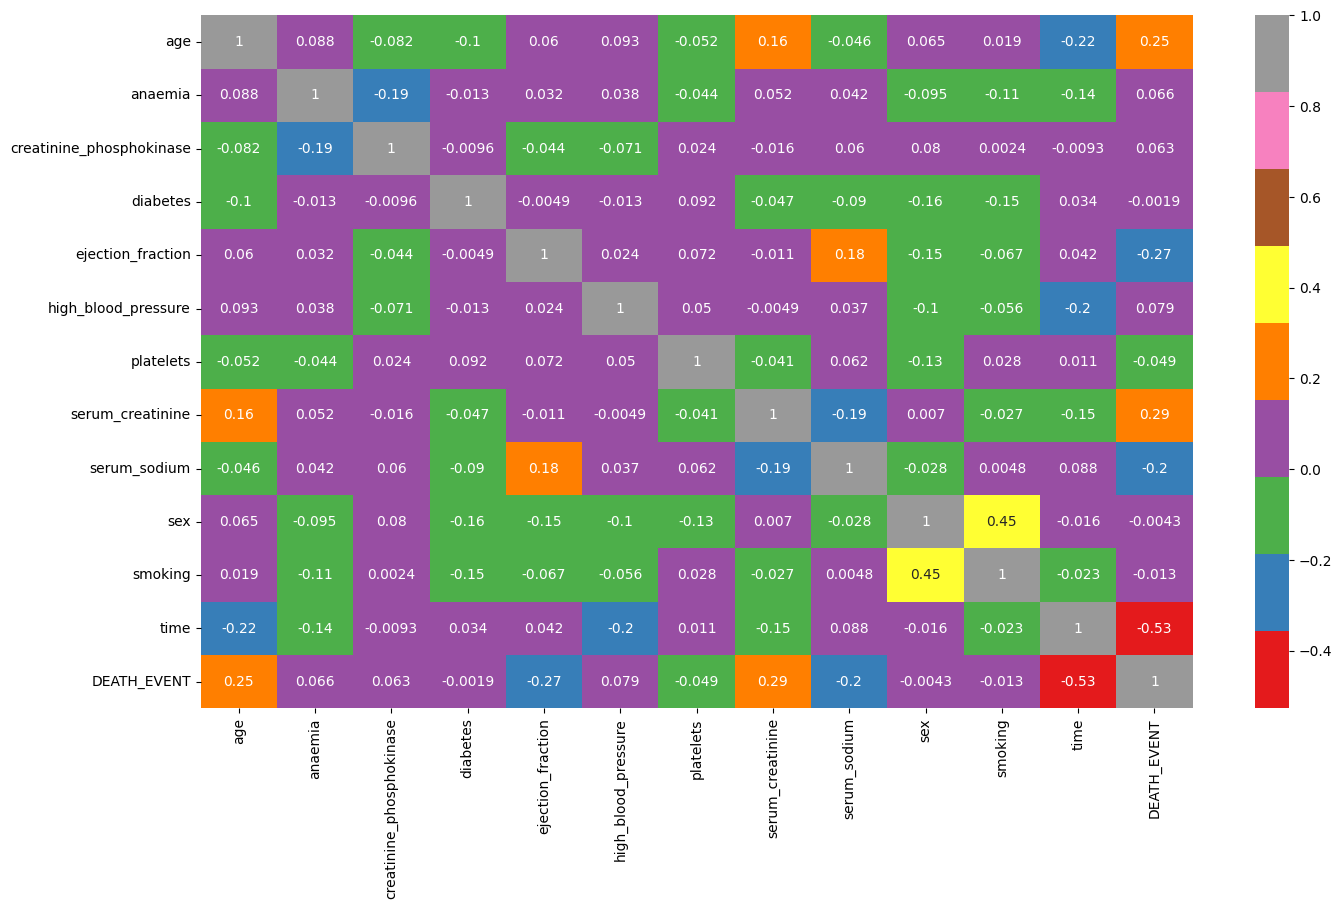

In [127]:
plt.figure(figsize=(16,9))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='Set1')
plt.show()


In [128]:
# training and normalization of data
X = data.iloc[:,:12].values
Y = data.iloc[:,12:].values


X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state=1)

# SScaler = StandardScaler()
# X_train = SScaler.fit_transform(X_train)
# X_test = SScaler.fit_transform(X_test)

In [129]:
X_train

array([[4.500e+01, 1.000e+00, 1.300e+02, ..., 1.000e+00, 1.000e+00,
        1.210e+02],
       [5.500e+01, 0.000e+00, 6.600e+01, ..., 1.000e+00, 0.000e+00,
        2.330e+02],
       [6.800e+01, 1.000e+00, 1.021e+03, ..., 1.000e+00, 0.000e+00,
        1.970e+02],
       ...,
       [8.500e+01, 0.000e+00, 5.882e+03, ..., 1.000e+00, 1.000e+00,
        7.200e+01],
       [7.700e+01, 1.000e+00, 1.090e+02, ..., 1.000e+00, 0.000e+00,
        2.090e+02],
       [8.200e+01, 1.000e+00, 8.550e+02, ..., 0.000e+00, 0.000e+00,
        3.000e+01]])

In [130]:
Y_train

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
    

In [131]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [132]:
from sklearn.linear_model import LogisticRegressionCV
model = LogisticRegressionCV(cv=11, max_iter=500)
model.fit(X_train,Y_train)
prediction = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [138]:
test_data = data.iloc[101:102]
output = test_data['DEATH_EVENT']
test_data.drop(['DEATH_EVENT'], axis = 1, inplace = True)
print("Predicted output = ",model.predict(test_data)[0])
print("Actual Output = ", output.values[0])

Predicted output =  0
Actual Output =  0


<ipython-input-138-6263fe9f9079>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.drop(['DEATH_EVENT'], axis = 1, inplace = True)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


In [139]:
print("The train accuracy score = ",round(model.score(X_train,Y_train)*100,2))
print("The test accuracy score = ",round(model.score(X_test,Y_test)*100,2))

The train accuracy score =  81.59
The test accuracy score =  88.33


In [140]:
from sklearn.metrics import confusion_matrix, classification_report
conf_matrix = confusion_matrix(Y_test,prediction)
print(conf_matrix)

[[44  2]
 [ 5  9]]


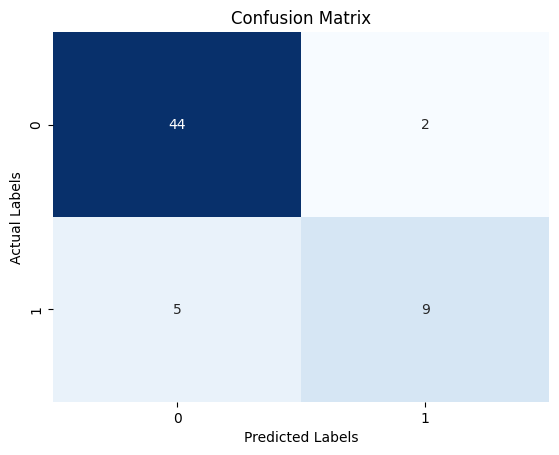

In [141]:
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.title("Confusion Matrix")
plt.show()

In [137]:
print(classification_report(Y_test,prediction))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        46
           1       0.82      0.64      0.72        14

    accuracy                           0.88        60
   macro avg       0.86      0.80      0.82        60
weighted avg       0.88      0.88      0.88        60

